### Project Description

The objective of this project is to develop an intelligent system employing data science and machine learning to automate the categorization of individuals into specific credit score categories.  

It reduces the manual effort involved in credit assessment, optimising operational processes and it aims to enable more customised financial services by precisely classifying customers based on their creditworthiness.  


### Problem Statement

This project aims to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.Specifically, we will use machine learning to build a machine learning model that can classify the credit score using a person’s credit-related information.

### Dataset description

1. ID: Represents a unique identification of an entry.
2. Customer_ID: Represents a unique identification of a person.
3. Month: Represents the month of the year.
4. Name: Represents the name of a person.
5. Age: Represents the age of the person.
6. SSN: Represents the social security number of a person.
7. Occupation: Represents the occupation of the person.
8. Annual Income: Represents the annual income of the person.
9. Monthly Inhand Salary: Represents the monthly base salary of a person.
10. Num Bank Accounts: Represents the number of bank accounts a person holds.
11. Num Credit Card: Represents the number of other credit cards held by a person.
12. Interest_Rate: Represents the interest rate on a credit card.
13. Num of Loan: Represents the number of loans taken from the bank.
14. Type of Loan: Represents the types of loan taken by a person.
15. Delay from due date: Represents the average number of days delayed from the payment date.
16. Num of Delayed Payment: Represents the average number of payments delayed by a person.
17. Changed Credit Limit: Represents the percentage change in the credit card limit.
18. Num Credit Inquiries: Represents the number of credit card inquiries.
19. Credit Mix: Represents the classification of the mix of credits.
20. Outstanding Debt: Represents the remaining debt to be paid (in USD).
21. Credit Utilization Ratio: Represents the utilization ratio of a credit card.
22. Credit History Age: Represents the age of the credit history of the person.
23. Payment of Min Amount: Represents whether only the minimum amount was paid by the person.
24. Total EMI per month: Represents the monthly EMI payments (in USD).
25. Amount invested monthly: Represents the monthly amount invested by the customer (in USD).
26. Payment Behaviour: Represents the payment behavior of the customer (in USD).
27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD).
28. Credit Score: Represents the bracket of credit score (Poor, Standard, Good).

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
custom_palette = ["#4631ad", "#a552a0", "#e8d1a0", "#61bfa0", "#7382a0", "#4c8ba0"]
sns.set(style="whitegrid", palette=custom_palette)

### Loading the dataset

In [3]:
data= pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Internship_ICT\credit.csv')
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


# Exploratory Data Analysis

### Understanding the data

In [4]:
df1 = data.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df1.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Checking null values

In [7]:
df1.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

__There are no null values in the data__

### Checking duplicate rows

In [8]:
duplicates = df1[df1.duplicated()]
num_duplicates = duplicates.shape[0]
num_duplicates

0

__There are no duplicate rows__

In [9]:
df1.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

### Analysing object columns

In [10]:
obj_columns = df1.select_dtypes(include=['object']).columns.tolist()
obj_columns

['Name',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

#### Occupation

In [11]:
df1['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

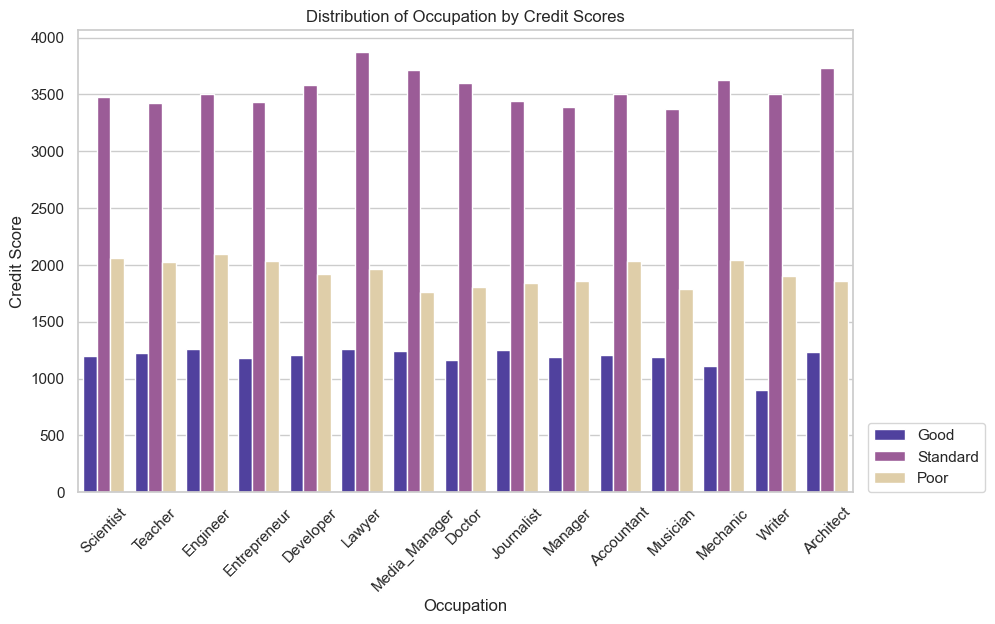

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Occupation', hue='Credit_Score')
plt.title('Distribution of Occupation by Credit Scores')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)
plt.legend(loc=(1.02,0))
plt.show()

Across all occupations, individuals tend to have a standard credit score more frequently, followed by poor credit scores, and finally, good credit scores.This insight can be crucial for understanding the creditworthiness of individuals across various occupations  

However, it’s important to consider that correlation does not imply causation, and individual creditworthiness may vary regardless of occupation

#### Credit Mix

An ideal credit mix includes a variety of revolving accounts, like credit cards, and installment accounts, like loans.If you want to make your credit score as perfect as possible, however, having credit mix will help you get there.

In [13]:
df1['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

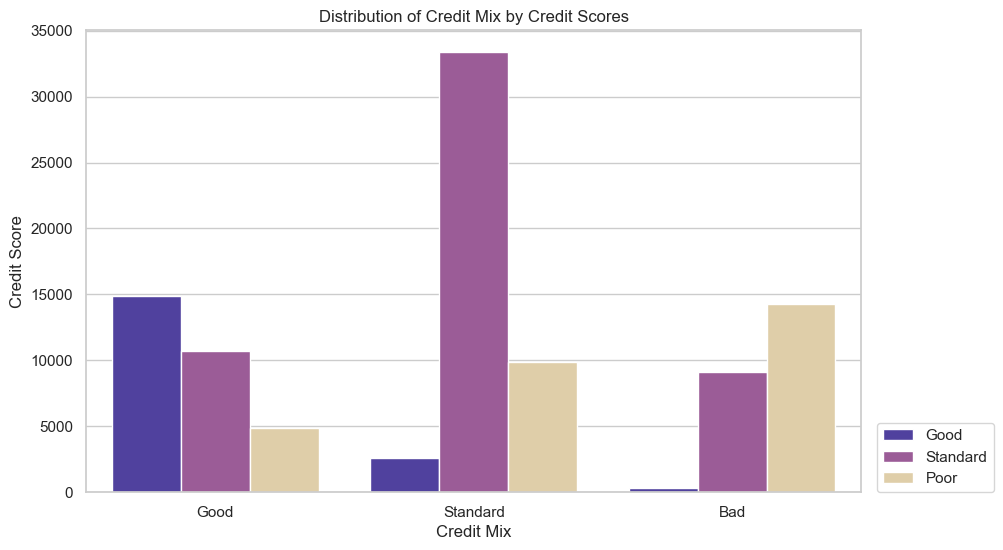

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Credit_Mix', hue='Credit_Score')
plt.title('Distribution of Credit Mix by Credit Scores')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

If the aspiration is to optimize one's credit score to the highest attainable level, it becomes imperative to consider the significant role that credit mix plays in achieving this objective. A comprehensive credit mix, encompassing a diverse range of credit types such as revolving credit (e.g., credit cards), installment loans (e.g., mortgages, auto loans), and other forms of credit, emerges as a critical factor in bolstering one's creditworthiness.  

Here also we can see relationship between credit score and credit mix

#### Payment of Min Amount

In [15]:
df1['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

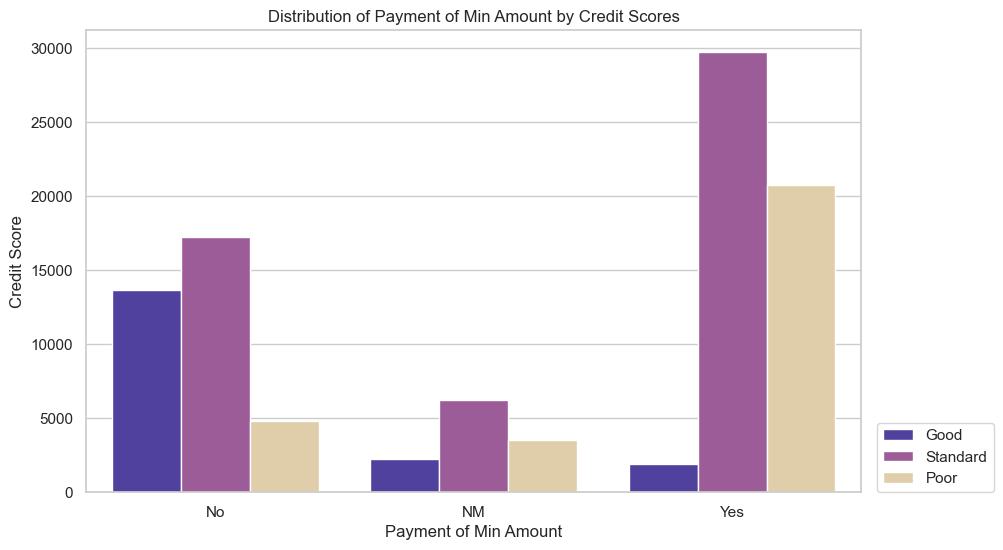

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Payment_of_Min_Amount', hue='Credit_Score')
plt.title('Distribution of Payment of Min Amount by Credit Scores')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

1. Good Credit Scores: Individuals with good credit scores tend to make minimum payments more frequently.
2. Poor Credit Scores: Conversely, those with lower credit scores are less consistent in making minimum payments.

#### Payment Behaviour

In [17]:
df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

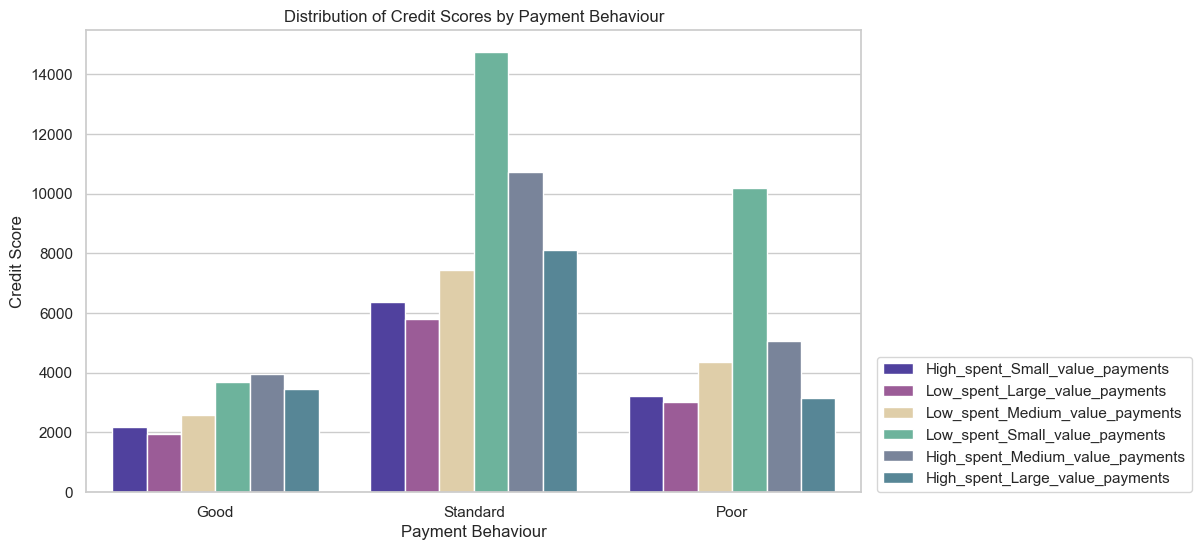

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Credit_Score', hue='Payment_Behaviour')
plt.title('Distribution of Credit Scores by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Credit Score')
plt.legend(loc=(1.02,0))
plt.show()

1. Standard Payment Behavior: Individuals with standard payment behavior tend to have the highest credit scores. The majority of them exhibit low spending on small value payments.
2. Poor Payment Behavior: While poor payment behavior shows a balanced distribution, it still has significantly lower credit score counts compared to standard behavior.
3. Good Payment Behavior: People with good payment behavior generally have lower counts across all spending categories, indicating a lower credit score.

#### Type of Loan

In [19]:
label_encoder = LabelEncoder()

In [20]:
df1['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [21]:
df1['Type_of_Loan'].nunique()

6261

In [22]:
df1['Type_of_loan_encoded'] = label_encoder.fit_transform(df1['Type_of_Loan'])

In [23]:
df1.shape

(100000, 29)

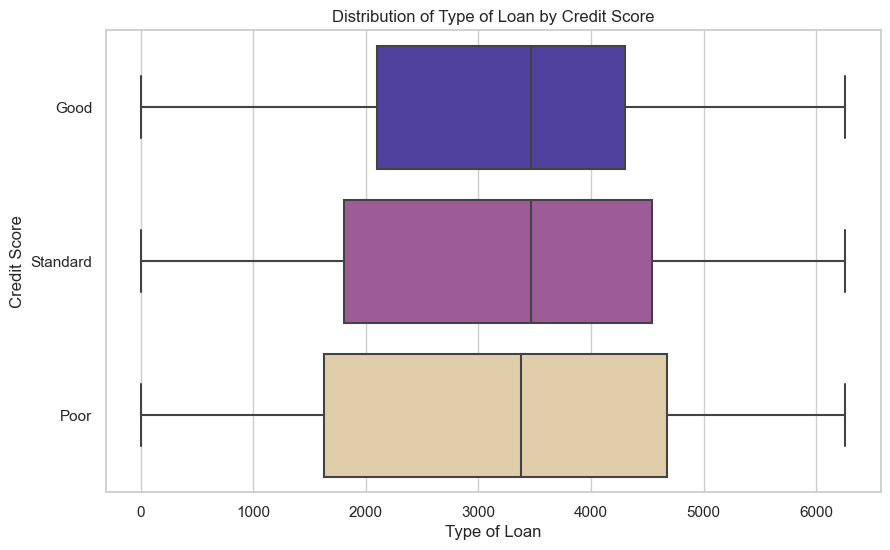

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_loan_encoded', y='Credit_Score', data=df1)
plt.title('Distribution of Type of Loan by Credit Score')
plt.xlabel('Type of Loan')
plt.ylabel('Credit Score')
plt.show()

While credit score plays a pivotal role in determining loan eligibility and terms, it is essential to recognize that the type of loan alone cannot definitively ascertain whether an individual has a good, poor or standard credit score. 

#### Conclusion

Upon analyzing the categorical variables in the dataset, it was found that the 'type of loan' column contains a large number of unique categorical values and exhibits less dependence on the credit score. Therefore, we can remove the 'type of loan' column from the dataset .

### Analysing numerical columns

In [25]:
df2 = data.copy()

In [26]:
score_mapping = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

In [27]:
df2['Credit_Score'] = df2['Credit_Score'].replace(score_mapping)

#### Correlation

In [28]:
cor = df2.corr(numeric_only = True)

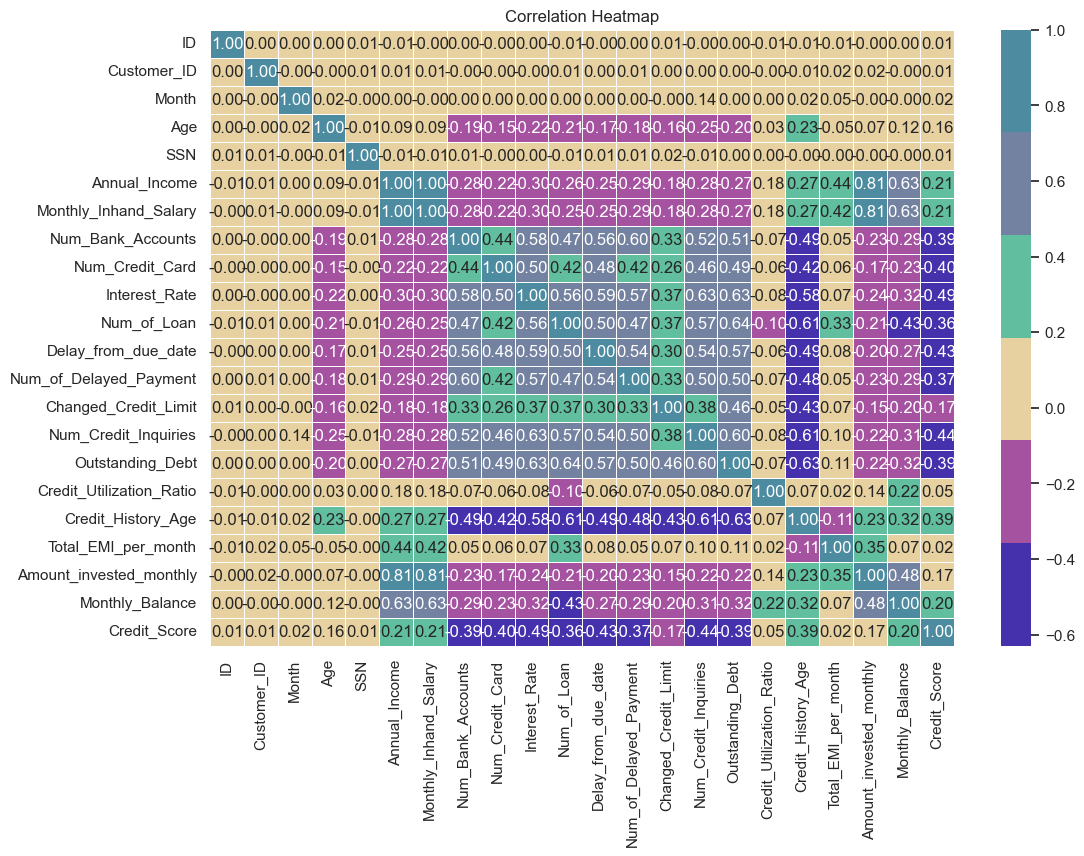

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

After conducting correlation analysis on the dataset, it is observed that the variables 'ID', 'Customer_ID', 'Month', and 'SSN' exhibit nearly zero correlation with other variables in the dataset. As a result, these variables are unlikely to contribute significantly to the analysis and modeling process. Therefore, we can drop these variables from the dataset.  

Monthly in-hand salary" and "annual income" have a high correlation with the credit score, and since they are highly correlated with each other, you can remove one of these features to reduce redundancy in your dataset.

#### Outliers detection

In [30]:
df3 = data.copy()

In [31]:
df3.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [32]:
print('Age',df3['Age'].unique())
print('Num_Bank_Accounts',df3['Num_Bank_Accounts'].unique())
print('Num_Credit_Card',df3['Num_Credit_Card'].unique())
print('Interest_Rate',df3['Interest_Rate'].unique())
print('Delay_from_due_date',df3['Delay_from_due_date'].unique())
print('Num_of_Loan',df3['Num_of_Loan'].unique())
print('Num_of_Delayed_Payment',df3['Num_of_Delayed_Payment'].unique())
print('Num_Credit_Inquiries',df3['Num_Credit_Inquiries'].unique())

Age [23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 50. 52.]
Num_Bank_Accounts [ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]
Num_Credit_Card [ 4.  5.  1.  7.  6.  8.  3.  9.  2. 10. 11.  0.]
Interest_Rate [ 3.  6.  8.  4.  5. 15.  7. 12. 20.  1. 14. 32. 16. 17. 10. 31. 25. 18.
 19.  9. 24. 13. 33. 11. 21. 29. 28. 30. 23. 34.  2. 27. 26. 22.]
Delay_from_due_date [ 3.  5.  6.  8.  7. 13. 10.  0.  4.  9.  1. 12. 11. 30. 31. 34. 27. 14.
  2. 16. 17. 15. 23. 22. 21. 18. 19. 52. 51. 48. 53. 26. 43. 28. 25. 20.
 47. 46. 49. 24. 61. 29. 50. 58. 45. 59. 55. 56. 57. 54. 62. 36. 41. 33.
 32. 39. 44. 42. 60. 35. 38. 40. 37.]
Num_of_Loan [4. 1. 3. 0. 2. 7. 5. 6. 8. 9.]
Num_of_Delayed_Payment [ 7.  4.  8.  6.  1.  3.  0.  5.  9. 15. 12. 17. 10.  2. 11. 14. 20. 22.
 13. 16. 19. 18. 21. 23. 24. 25.]
Num_Credit_Inquiries [ 4.  2.  3.  5.  9.  8.  7.  6.  0.  1. 10. 11. 12. 17. 13. 

Based on the analysis on columns with relatively low number of unique values it is found that these columns are free from outliers.

In [33]:
Col_to_drop = ['ID','Customer_ID','Month','Name','Age','SSN','Occupation','Num_Bank_Accounts',
               'Num_Credit_Card','Interest_Rate','Num_of_Loan','Type_of_Loan','Delay_from_due_date',
               'Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_Mix','Payment_of_Min_Amount',
               'Payment_Behaviour','Credit_Score']
df3.drop(columns = Col_to_drop, inplace = True)

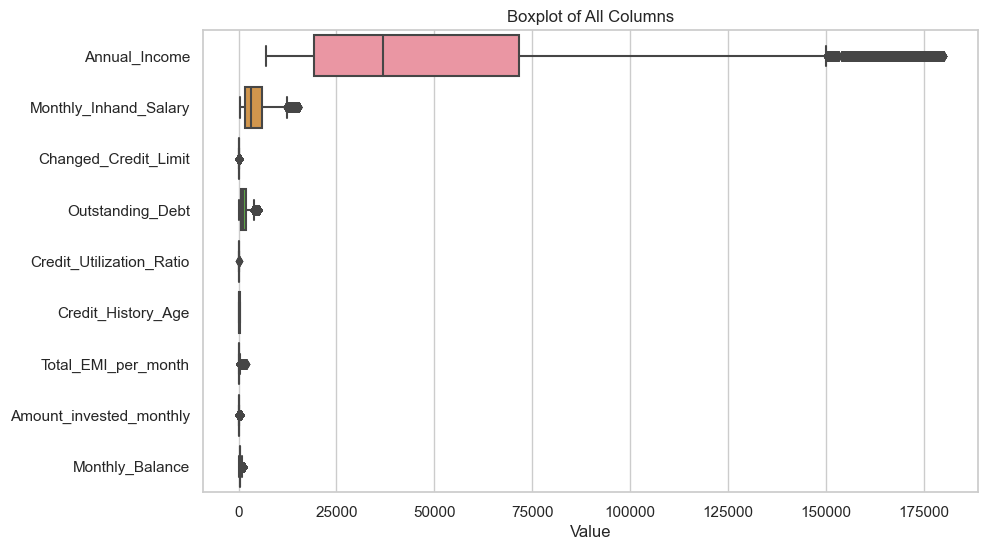

In [34]:
# To find the columns with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3, orient="h")
plt.title('Boxplot of All Columns')
plt.xlabel('Value')
plt.show()

Upon analyzing the data, it is identified that eight columns exhibit outliers.

In [35]:
selected_columns = ['Annual_Income','Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month', 'Amount_invested_monthly','Monthly_Balance']

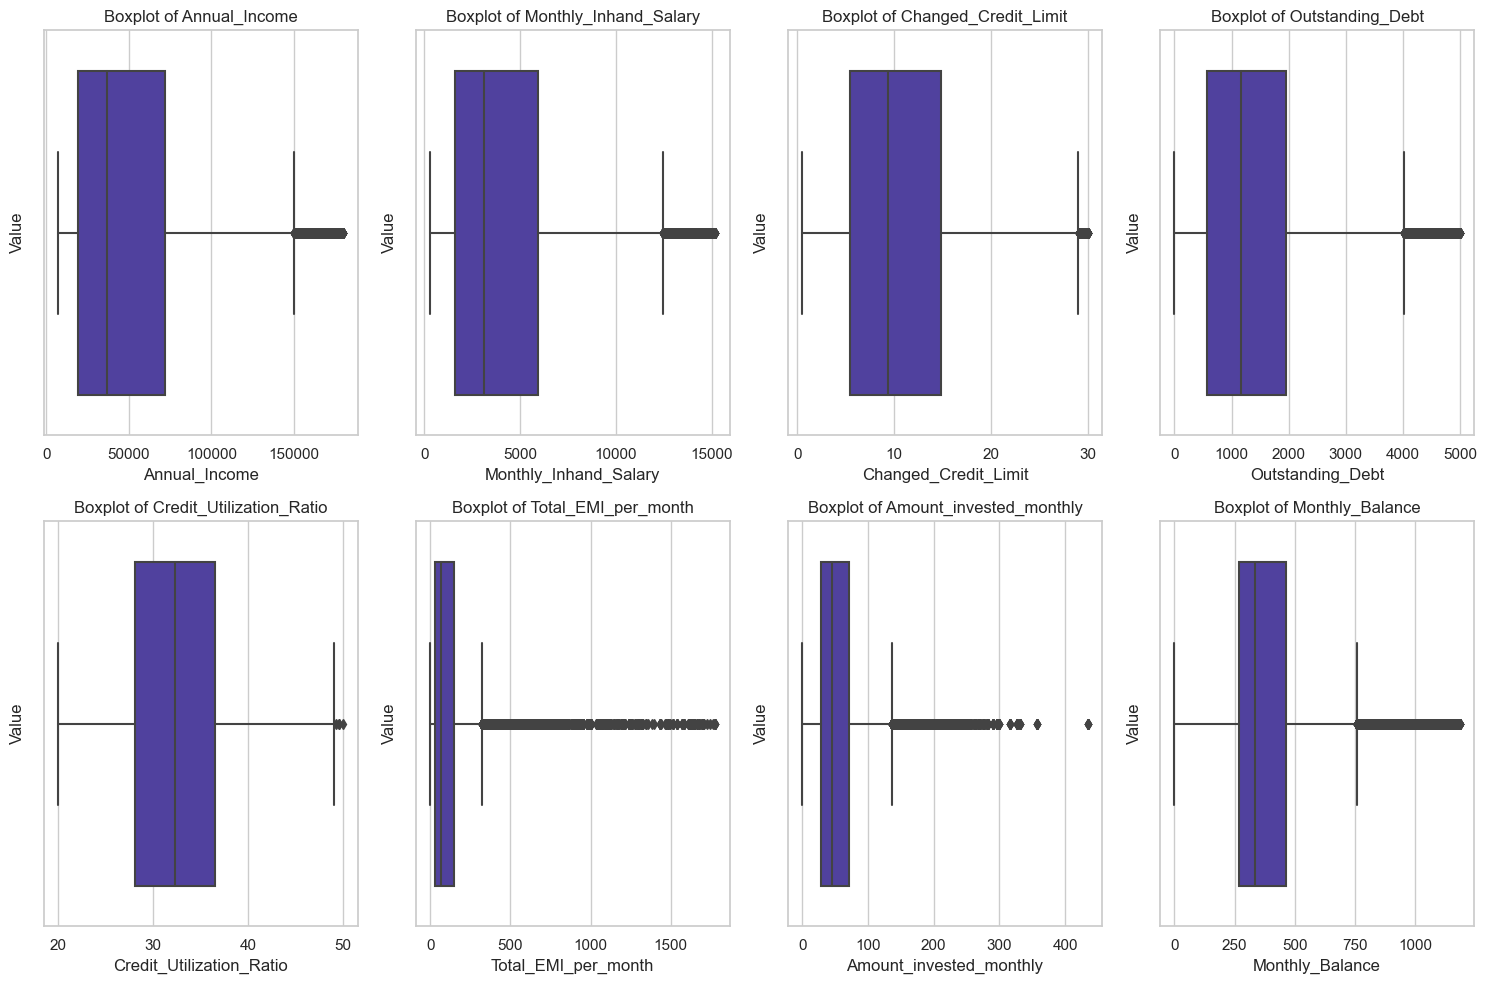

In [36]:
# Setting up subplots
num_cols = 4
num_rows = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(x=column, data=df3, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

### Mutual Information Score (MI Score)

It will help you to recognize the most valuable variables for the prediction.

In [37]:
df4 = data.copy()

In [38]:
obj_columns = df4.select_dtypes(include=['object']).columns

In [39]:
encoder = OrdinalEncoder()
df4[obj_columns] = encoder.fit_transform(df4[obj_columns])

In [40]:
y = df4['Credit_Score']
x = df4.drop(columns=['Credit_Score'])

In [41]:
mi_scores = mutual_info_classif(x, y)

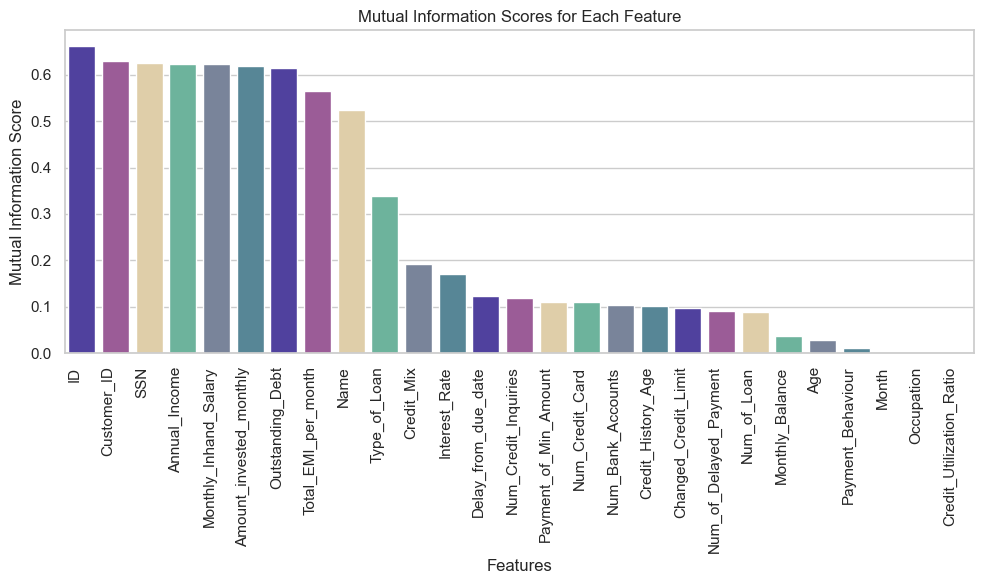

In [42]:
sorted_mi_scores = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

# Create a DataFrame from the sorted data
df_mi = pd.DataFrame({'Features': x.columns, 'MI Score': mi_scores})
df_mi = df_mi.sort_values(by='MI Score', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Features', y='MI Score', data=df_mi, palette= custom_palette)
plt.title('Mutual Information Scores for Each Feature')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Conclusion

After computing mutual information scores for each feature, it is observed that the following five features have relatively low impact on the credit score: Monthly_Balance, Age, Payment_Behaviour, Occupation, and Credit_Utilization_Ratio.This suggests that these features may not significantly contribute to the prediction of credit scores. Therefore, we can remove these columns from the dataset.

### Checking data balance

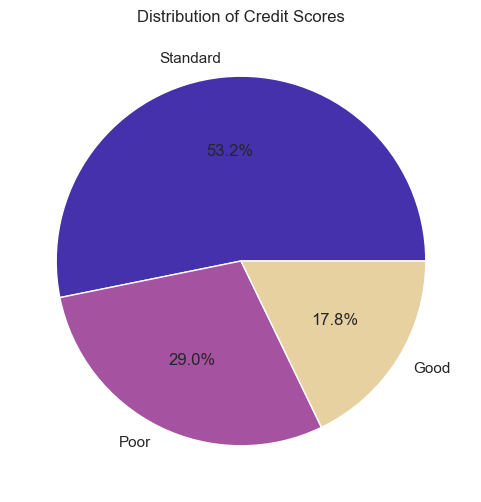

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [43]:
plt.figure(figsize=(6, 6))
data['Credit_Score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Credit Scores')
plt.ylabel('')
plt.show()
data['Credit_Score'].value_counts()

The dataset suffers from class imbalance, indicating a significant inconsistency in the distribution of target classes. This imbalance could potentially bias the predictive model towards the majority class and lead to poor performance in predicting the minority class.

# Data Preprocessing

In [44]:
data_preprocessing = data.copy()

### Dropping unwanted columns

In [45]:
Cols_to_drop = ['ID','Customer_ID','Name','SSN','Type_of_Loan']
data_preprocessing.drop(columns = Cols_to_drop, inplace = True)
data_preprocessing.shape

(100000, 23)

### Balancing the data

 * Imbalanced datasets can lead to biased models that favor the majority class.
 * Balancing the data helps improve the performance of machine learning models, especially for metrics like accuracy, precision, recall, and F1-score.
 * By balancing the data, the model is less likely to overfit to the majority class and can generalize better to unseen data.

In [46]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y = data_preprocessing["Credit_Score"]
X = data_preprocessing.drop("Credit_Score", axis=1)
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [47]:
new_data.shape

(159522, 23)

### Encoding

In [48]:
new_data.dtypes

Month                         int64
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [49]:
label_encoder = LabelEncoder()

In [50]:
# Occupation
new_data['Occupation'] = label_encoder.fit_transform(new_data['Occupation'])

In [51]:
# Payment behaviour
new_data['Payment_Behaviour'] = label_encoder.fit_transform(new_data['Payment_Behaviour'])

In [52]:
# Credit mix
Credit_Mix_catagories = ['Good', 'Standard', 'Bad']

encoder_Payment_of_Credit_Mix = OrdinalEncoder(categories=[Credit_Mix_catagories])

new_data['Credit_Mix'] = encoder_Payment_of_Credit_Mix.fit_transform(new_data[['Credit_Mix']])

In [53]:
# Payment of min amount
Payment_of_Min_Amount_catagories = ['No', 'NM', 'Yes']

encoder_Payment_of_Min_Amount = OrdinalEncoder(categories=[Payment_of_Min_Amount_catagories])

new_data['Payment_of_Min_Amount'] = encoder_Payment_of_Min_Amount.fit_transform(new_data[['Payment_of_Min_Amount']])

In [54]:
# Credit score
credit_Score_categories = ['Poor', 'Standard', 'Good']

encoder_credit_Score = OrdinalEncoder(categories=[credit_Score_categories])

new_data['Credit_Score'] = encoder.fit_transform(new_data[['Credit_Score']])

In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159522 entries, 0 to 159521
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     159522 non-null  int64  
 1   Age                       159522 non-null  float64
 2   Occupation                159522 non-null  int32  
 3   Annual_Income             159522 non-null  float64
 4   Monthly_Inhand_Salary     159522 non-null  float64
 5   Num_Bank_Accounts         159522 non-null  float64
 6   Num_Credit_Card           159522 non-null  float64
 7   Interest_Rate             159522 non-null  float64
 8   Num_of_Loan               159522 non-null  float64
 9   Delay_from_due_date       159522 non-null  float64
 10  Num_of_Delayed_Payment    159522 non-null  float64
 11  Changed_Credit_Limit      159522 non-null  float64
 12  Num_Credit_Inquiries      159522 non-null  float64
 13  Credit_Mix                159522 non-null  f

Label Encoder is suitable for nominal categorical variables without an inherent order, while Ordinal Encoder is suitable for ordinal categorical variables with a meaningful order or ranking

# Feature engineering

### RFE method

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
estimator = LinearRegression()

In [58]:
rfe = RFE(estimator, n_features_to_select=21)

In [59]:
y1 = new_data["Credit_Score"]
X1 = new_data.drop("Credit_Score", axis=1)

In [60]:
rfe.fit(X1, y1)

RFE(estimator=LinearRegression(), n_features_to_select=21)

In [61]:
selected_features = X1.columns[rfe.support_]

In [62]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Month', 'Age', 'Occupation', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


## Splitting the data

In [63]:
y2 = new_data['Credit_Score']
X2 = new_data[['Month', 'Age', 'Occupation', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Training the model

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [66]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "Decision Tree classifier" : DecisionTreeClassifier(),
}

In [67]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(report)

K-Nearest Neighbors Accuracy: 0.8132
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86     10710
         1.0       0.82      0.89      0.86     10578
         2.0       0.82      0.61      0.70     10617

    accuracy                           0.81     31905
   macro avg       0.81      0.81      0.81     31905
weighted avg       0.81      0.81      0.81     31905

Random Forest Accuracy: 0.9197
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10710
         1.0       0.89      0.97      0.93     10578
         2.0       0.95      0.80      0.87     10617

    accuracy                           0.92     31905
   macro avg       0.92      0.92      0.92     31905
weighted avg       0.92      0.92      0.92     31905

GradientBoostingClassifier Accuracy: 0.7427
GradientBoostingClassifier Classification Repo

In [68]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = model.predict(X_test)

In [69]:
result = confusion_matrix(y_test,rf_pred)

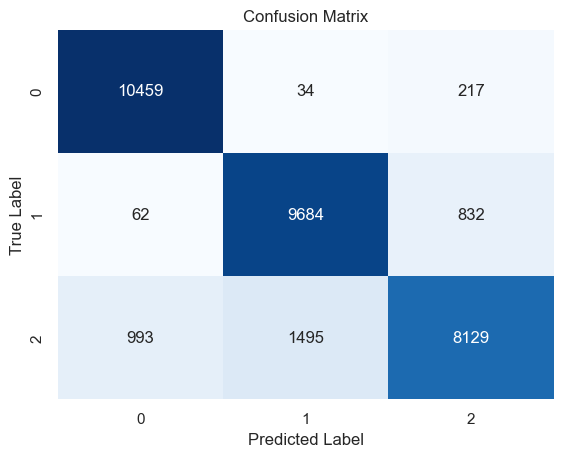

In [70]:
sns.heatmap(result, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Cross validation

### K Fold Cross Validation

In [71]:
from sklearn.model_selection import KFold
kfold_validator  = KFold(10)

In [72]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(rf_model,X2,y2,cv = kfold_validator)

In [73]:
cv_result,cv_result.mean()

(array([0.78850373, 0.79546167, 0.79651454, 0.785168  , 0.78209629,
        0.79801906, 0.9459002 , 1.        , 1.        , 1.        ]),
 0.8691663492640525)

The array of performance scores indicates the performance achieved in each fold of the cross-validation process. These scores can vary depending on the specific data splits used in each fold.

In summary, based on the cross-validation result, the model demonstrates reasonable performance, but additional analysis and validation may be needed to fully assess its effectiveness for the intended purpose.

# Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20]
}

In [76]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

In [77]:
random_search.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'n_estimators': [100, 300, 500]},
                   scoring='accuracy', verbose=2)

In [78]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 500, 'max_depth': None}
Best Cross-Validation Score: 0.9080608474045336


In [79]:
best_rf_model = random_search.best_estimator_

In [80]:
best_rf_model.fit(X_train, y_train)
y_pred1 = best_rf_model.predict(X_test)

In [147]:
unique_values, counts = np.unique(y_pred1, return_counts=True)

In [151]:
for value, count in zip(unique_values, counts):
    print("Value:", value, "Count:", count)

Value: 0.0 Count: 11445
Value: 1.0 Count: 11512
Value: 2.0 Count: 8948


In [81]:
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.921015514809591

# Model Interpretability

In [92]:
from pdpbox import pdp
from sklearn.tree import plot_tree

### Feature importance analysis

In [93]:
features = ['Month', 'Age', 'Occupation', 'Monthly_Inhand_Salary',
            'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
            'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
            'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Credit_History_Age',
            'Payment_of_Min_Amount', 'Total_EMI_per_month',
            'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

In [94]:
feature_importance = best_rf_model.feature_importances_

In [95]:
feature_importance

array([0.03877929, 0.03476417, 0.02662527, 0.04328038, 0.03129068,
       0.03441575, 0.08522698, 0.02293007, 0.06373571, 0.03719253,
       0.04856636, 0.04549436, 0.09269694, 0.1125208 , 0.03674162,
       0.06788263, 0.03612904, 0.04283445, 0.04004933, 0.01805406,
       0.04078958])

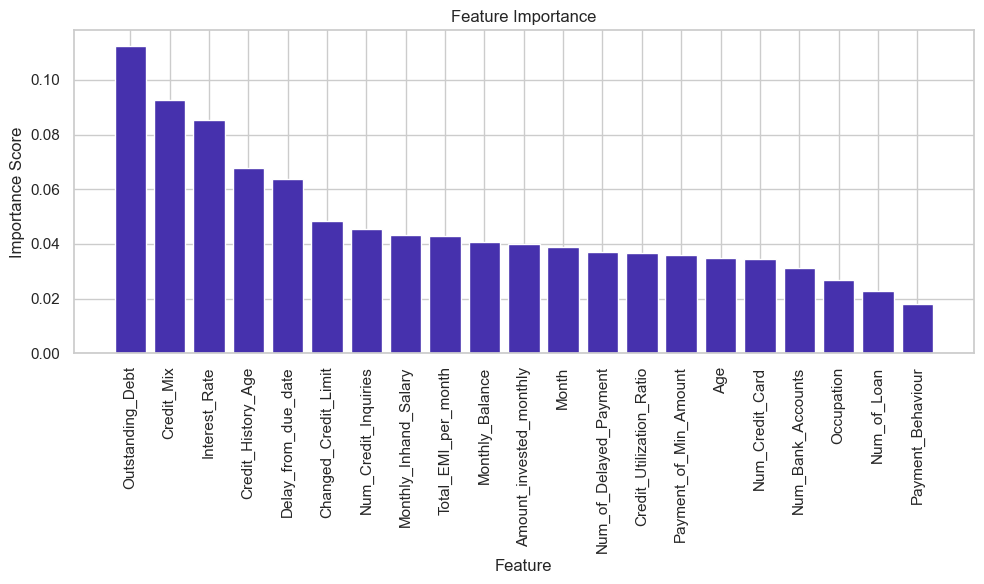

In [96]:
sorted_features, sorted_importance = zip(*sorted(zip(features, feature_importance), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 6))
num_features = len(sorted_features)
plt.bar(range(num_features), sorted_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(range(num_features), sorted_features, rotation=90)
plt.tight_layout()
plt.show()

###  LIME (Local Interpretable Model-agnostic Explanations)

LIME (Local Interpretable Model-agnostic Explanations) is a method used to explain the predictions of machine learning models by approximating them locally around specific instances. It aims to provide insights into how a model arrives at its predictions, especially in cases where the model's behavior might seem opaque or difficult to interpret.

In [210]:
from lime.lime_tabular import LimeTabularExplainer
from lime import lime_tabular

In [110]:
X_train.shape

(127617, 21)

In [156]:
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['good', 'standard', 'poor'])

In [196]:
sample_idx = 1  # Change this to select a different sample
sample = X_test.iloc[sample_idx]

In [197]:
explanation = explainer.explain_instance(sample.values, best_rf_model.predict_proba)

In [198]:
explanation.show_in_notebook()

* This shows the predicted probabilities for each class of the target variable ("good", "standard", "poor"). For this perticular instance, the model predicts a probability of 0.90 for the "good" class, 0.03 for the "standard" class, and 0.07 for the "poor" class.
* The "NOT standard" and "standard" columns display the features along with their corresponding values for the instance being explained.
* Each feature's importance is represented by the length of the colored bar. 
* Features with longer bars have a greater impact on the model's prediction.
* The color of the bar indicates whether the feature value is above or below the threshold value.

In conclusion, LIME (Local Interpretable Model-agnostic Explanations) provides valuable insights into how machine learning models arrive at their predictions at a local level, focusing on individual instances.By creating interpretable simple models around specific instances, LIME sheds light on the features that contribute most significantly to the model's prediction for that instance. This local sensitivity analysis helps users understand the inner workings of black-box models like the model used in this project and identify the key factors driving their predictions. Ultimately, LIME enhances the transparency and interpretability of machine learning models, facilitating trust, accountability, and informed decision-making in various domains.

# Performance Validation

In [215]:
y_pred_final = best_rf_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)

In [218]:
print(accuracy_final)
print(report_final)

0.921015514809591
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     10710
         1.0       0.89      0.97      0.93     10578
         2.0       0.95      0.80      0.87     10617

    accuracy                           0.92     31905
   macro avg       0.92      0.92      0.92     31905
weighted avg       0.92      0.92      0.92     31905



* Class 0 (representing good credit score) has high precision (0.93) and recall (0.99), indicating that when the model predicts this class, it is correct 93% of the time, and it successfully identifies 99% of all actual instances of this class.
* Class 1 (representing standard credit score) also has relatively low precision (0.89) and but high recall (0.97), suggesting good performance in identifying this class.
* Class 2 (representing poor credit score) has higher precision (0.95) but relatively lower recall (0.80), indicating that while the model identifies this class correctly most of the time, it may miss some instances of this class.
* The number of instances of each class in the dataset is provided under the "Support" column. This gives the idea of the distribution of classes in the dataset.
* Accuracy measures the overall correctness of your model across all classes.
* Macro Average calculates the unweighted average of precision, recall, and F1-score across all classes, giving equal weight to each class.
* Weighted Average calculates the weighted average of precision, recall, and F1-score across all classes, where each score is weighted by the number of true instances for each class.

In [225]:
result2 = confusion_matrix(y_test,y_pred_final)

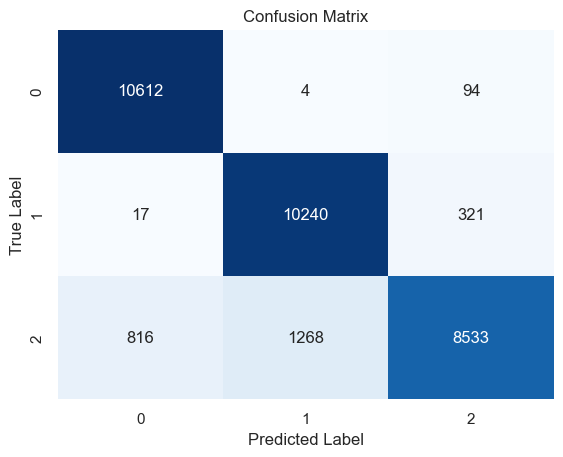

In [227]:
sns.heatmap(result2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* The classifier performs well in predicting class 0 and class 1 instances, as indicated by the high true positive counts and low false positive and false negative counts.  
* Class 2 has a higher number of false positive and false negative predictions, indicating that the classifier struggles more with predicting class 2 instances accurately.

#### Conclusion

Overall, the model performs well in predicting good and standard credit scores. However, it may need further improvement, particularly in distinguishing poor credit scores to reduce the number of false positives in this class.

It's essential to consider the consequences of false positives and false negatives in the credit scoring application. Depending on the business context, it is needed to adjust the model's threshold to optimize its performance according to the objectives, such as maximizing overall accuracy or minimizing false positives.

# Threshold Selection

In [274]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [270]:
y_true = y2.values

In [271]:
y_prob = best_rf_model.predict_proba(X_test)

In [272]:
# Convert labels to binary format
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

In [275]:
# Calculate AUC-ROC for each class
auc_roc = roc_auc_score(y_test_binarized, y_prob, average='macro')

print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9844004795330649


In [278]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(best_rf_model.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

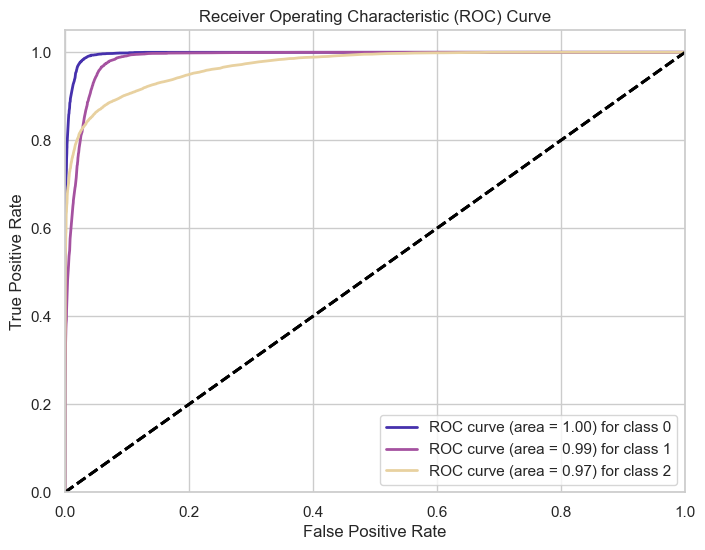

In [281]:
plt.figure(figsize=(8, 6))
for i in range(best_rf_model.classes_.shape[0]):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [291]:
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(best_rf_model.classes_.shape[0]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Find the optimal threshold for each class
optimal_thresholds = dict()
for i in range(best_rf_model.classes_.shape[0]):
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_thresholds[i] = thresholds[i][optimal_idx]

# Implement the optimal thresholds in the model
y_pred_optimal = np.zeros_like(y_prob)
for i in range(best_rf_model.classes_.shape[0]):
    y_pred_optimal[:, i] = (y_prob[:, i] >= optimal_thresholds[i]).astype(int)

# Evaluate the model with optimal thresholds
accuracy_optimal = accuracy_score(y_test_binarized, y_pred_optimal)
precision_optimal = precision_score(y_test_binarized, y_pred_optimal, average='macro')
recall_optimal = recall_score(y_test_binarized, y_pred_optimal, average='macro')
f1_score_optimal = f1_score(y_test_binarized, y_pred_optimal, average='macro')

print("Optimal Thresholds:", optimal_thresholds)
print("Accuracy with Optimal Thresholds:", accuracy_optimal)
print("Precision with Optimal Thresholds:", precision_optimal)
print("Recall with Optimal Thresholds:", recall_optimal)
print("F1-Score with Optimal Thresholds:", f1_score_optimal)

Optimal Thresholds: {0: 0.544, 1: 0.422, 2: 0.288}
Accuracy with Optimal Thresholds: 0.8932142297445541
Precision with Optimal Thresholds: 0.8993411612525274
Recall with Optimal Thresholds: 0.9455690120780466
F1-Score with Optimal Thresholds: 0.9215317604337404


In [299]:
y_pred_optimal

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [298]:
y_pred_single_label = np.argmax(y_pred_optimal, axis=1)

In [300]:
y_pred_single_label

array([2, 0, 0, ..., 0, 0, 2], dtype=int64)

In [305]:
accuracy_final1 = accuracy_score(y_test, y_pred_single_label)
report_final1 = classification_report(y_test, y_pred_single_label)
print(accuracy_final1)
print(report_final1)

0.9221438645980254
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     10710
         1.0       0.88      0.97      0.93     10578
         2.0       0.95      0.81      0.87     10617

    accuracy                           0.92     31905
   macro avg       0.92      0.92      0.92     31905
weighted avg       0.92      0.92      0.92     31905



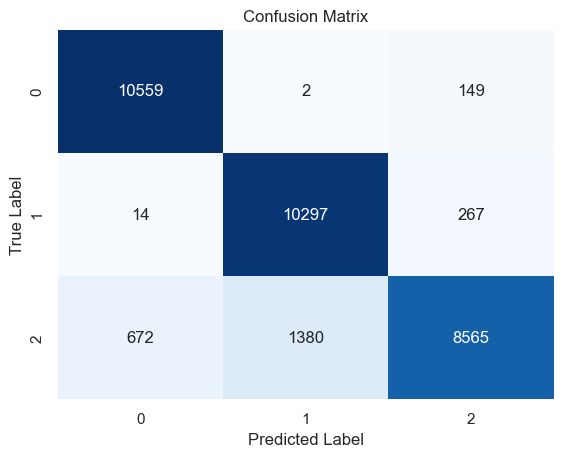

In [306]:
result3 = confusion_matrix(y_test,y_pred_single_label)
sns.heatmap(result3, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Conclusion

The optimization of threshold values has significantly improved the model's performance metrics, including accuracy, precision, recall, and F1-score.

In the business context of credit score classification, achieving a balance in predictions is crucial to avoid one-sided outcomes that could impact both lenders and borrowers.  